In [ ]:
# Step 1: Install kaggle CLI
!pip install -q kaggle

# Step 2: Create kaggle folder and move kaggle.json there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # secure the file

# Step 3: Download a dataset from Kaggle
!kaggle datasets download -d obulisainaren/retinal-oct-c8

import zipfile
zip_ref = zipfile.ZipFile('/content/retinal-oct-c8.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/obulisainaren/retinal-oct-c8
License(s): CC-BY-NC-SA-4.0
 99% 1.41G/1.42G [00:12<00:00, 200MB/s]
100% 1.42G/1.42G [00:12<00:00, 122MB/s]


In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout,BatchNormalization,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import MobileNetV2

In [ ]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/RetinalOCT_Dataset/RetinalOCT_Dataset/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/RetinalOCT_Dataset/RetinalOCT_Dataset/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 18400 images belonging to 8 classes.
Found 2800 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Convolutional base (custom instead of MobileNetV2)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Dense layers (similar to your original structure)
model.add(Dense(384, activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(8, activation='softmax'))  # 8 classes

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 164s 254ms/step - accuracy: 0.2612 - loss: 1.9769 - val_accuracy: 0.2968 - val_loss: 1.6187
Epoch 2/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 144s 251ms/step - accuracy: 0.5457 - loss: 1.0200 - val_accuracy: 0.5896 - val_loss: 1.0768
Epoch 3/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 141s 245ms/step - accuracy: 0.6544 - loss: 0.8424 - val_accuracy: 0.5739 - val_loss: 1.2181
Epoch 4/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 141s 246ms/step - accuracy: 0.7218 - loss: 0.7012 - val_accuracy: 0.7646 - val_loss: 0.6118
Epoch 5/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 141s 245ms/step - accuracy: 0.7771 - loss: 0.5828 - val_accuracy: 0.6857 - val_loss: 0.9777
Epoch 6/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 142s 246ms/step - accuracy: 0.8128 - loss: 0.4995 - val_accuracy: 0.8218 - val_loss: 0.4731
Epoch 7/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 141s 245ms/step - accuracy: 0.8391 - loss: 0.4406 - val_accuracy: 0.8393 - val_loss: 0.4877
Epoch 8/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 141s 246ms/step - accuracy: 0.8610 -

In [ ]:
model.save('eye_cnn.h5')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create test data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test dataset from your folder structure
test_generator = test_datagen.flow_from_directory(
    '/content/RetinalOCT_Dataset/RetinalOCT_Dataset/test',           # Path to your test folder
    target_size=(150, 150),    # Should match training image size
    batch_size=32,
    class_mode='sparse',       # Since you're using sparse_categorical_crossentropy
    shuffle=False              # Important to keep label order consistent for evaluation
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")


Found 2800 images belonging to 8 classes.
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9333 - loss: 0.1965

✅ Test Accuracy: 91.61%


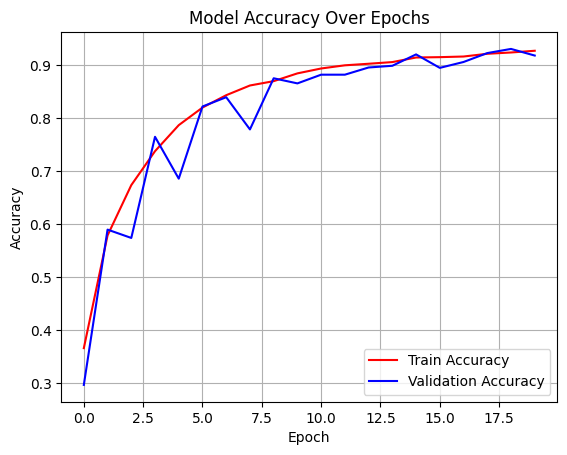

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


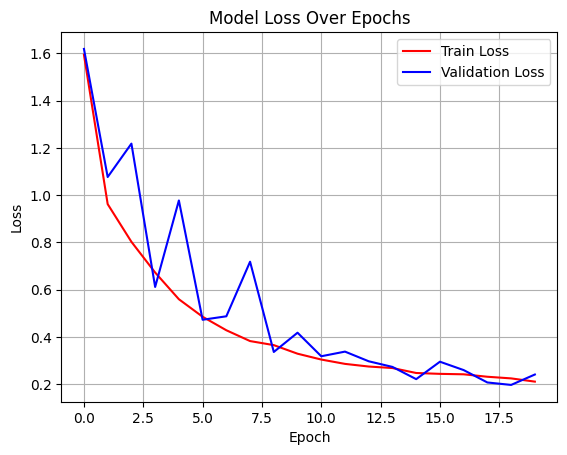

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')

plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 2800 images belonging to 8 classes.
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step


<Figure size 1000x800 with 0 Axes>

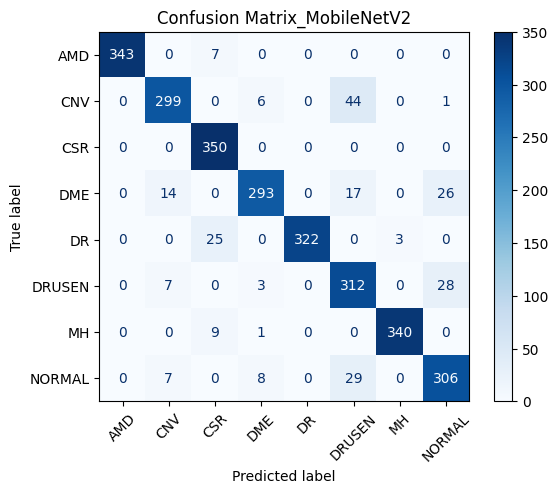

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Define class names in the same order as your folder structure
class_names = ['AMD', 'CNV', 'CSR', 'DME', 'DR', 'DRUSEN', 'MH', 'NORMAL']

# Step 2: Create test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/RetinalOCT_Dataset/RetinalOCT_Dataset/test',              # Path to test data
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',          # Because labels are integer encoded
    shuffle=False                 # Keep order for accurate confusion matrix
)

# Step 3: Get true labels
true_labels = test_generator.classes

# Step 4: Predict using the trained model
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

# Step 5: Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix_MobileNetV2')
plt.grid(False)
plt.show()


In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras eye_cnn.h5 my_tfjs_model/
import shutil
shutil.make_archive('my_tfjs_model', 'zip', 'my_tfjs_model')

from google.colab import files
files.download('my_tfjs_model.zip')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


2025-07-11 10:22:19.897038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752229339.917643   17778 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752229339.923977   17778 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>